In [16]:
%matplotlib inline
import pathlib
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


In [2]:


BASE_DATA_FOLDER = "seedlings_data/"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "train")



In [3]:


images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_rgb = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
        images_per_class[class_label].append(image_bgr)



In [4]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Cleavers -> 287
Sugar beet -> 385
Common Chickweed -> 611
Loose Silky-bent -> 654
Scentless Mayweed -> 516
Shepherds Purse -> 231
Fat Hen -> 475
Common wheat -> 221
Black-grass -> 263
Small-flowered Cranesbill -> 496
Charlock -> 390
Maize -> 221


In [21]:
def plot_for_class(label):
    nb_rows = 5
    nb_cols = 5
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1      

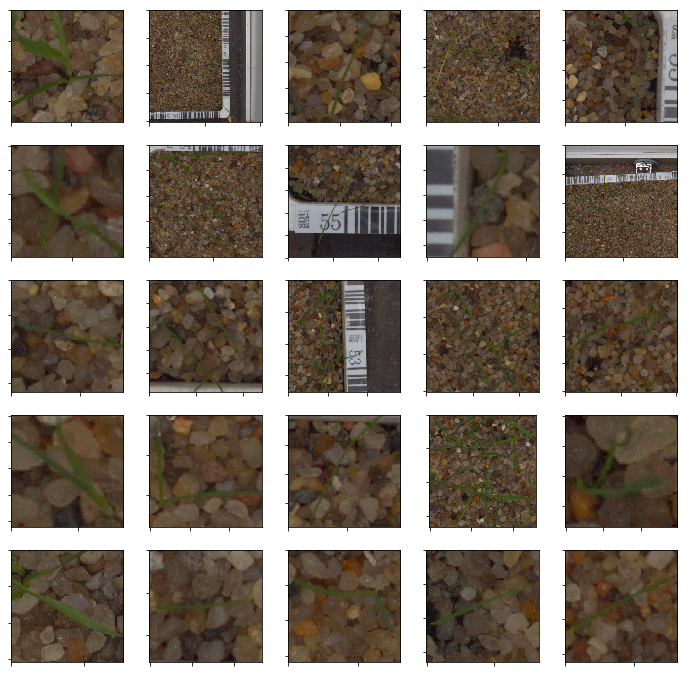

In [22]:
plot_for_class("Loose Silky-bent")

In [5]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

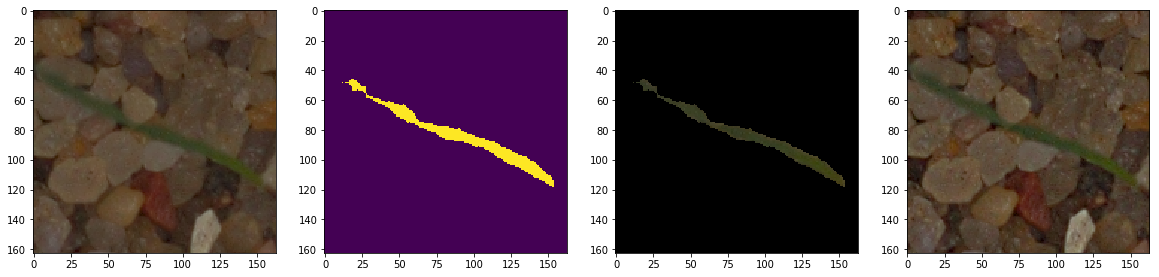

In [14]:
# Test image to see the changes
image = images_per_class["Black-grass"][10]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [39]:
TRAIN_SEGM_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "train_segmented/")

for key, value in images_per_class.items():
    print(key)
    images = images_per_class[key]
    save_folder = os.path.join(TRAIN_SEGM_DATA_FOLDER, key)
    print(save_folder)
    pathlib.Path(save_folder).mkdir(parents=True, exist_ok=True)
    print('Segmenting class: ' + key)
    i = 0
    for img in images:
        image_mask = create_mask_for_plant(img)
        image_segmented = segment_plant(img)
        image_sharpen = sharpen_image(img)
        image_segmented = cv2.resize(image_segmented, (300, 300), interpolation=cv2.INTER_AREA)
        cv2.imwrite("%s/%s_%i.png" % (save_folder, 'segm_', i), image_segmented)
        i = i+1
    

Cleavers
seedlings_data/train_segmented/Cleavers
Segmenting class: Cleavers
Sugar beet
seedlings_data/train_segmented/Sugar beet
Segmenting class: Sugar beet
Common Chickweed
seedlings_data/train_segmented/Common Chickweed
Segmenting class: Common Chickweed
Loose Silky-bent
seedlings_data/train_segmented/Loose Silky-bent
Segmenting class: Loose Silky-bent
Scentless Mayweed
seedlings_data/train_segmented/Scentless Mayweed
Segmenting class: Scentless Mayweed
Shepherds Purse
seedlings_data/train_segmented/Shepherds Purse
Segmenting class: Shepherds Purse
Fat Hen
seedlings_data/train_segmented/Fat Hen
Segmenting class: Fat Hen
Common wheat
seedlings_data/train_segmented/Common wheat
Segmenting class: Common wheat
Black-grass
seedlings_data/train_segmented/Black-grass
Segmenting class: Black-grass
Small-flowered Cranesbill
seedlings_data/train_segmented/Small-flowered Cranesbill
Segmenting class: Small-flowered Cranesbill
Charlock
seedlings_data/train_segmented/Charlock
Segmenting class: Ch